In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
import pickle
import UCB_I, Tsallis_INF, Thompson_Sampling
from Corralling_UCB import Corral_stoch

In [2]:
regrets_list = []
corral_distr_list = []
corral_instance_list = []
rounds_index_list = []
rewards_params_list = []
alg_rewards_list = []
num_arms_list = []
alg_pulls_list =[]
for i in range(10):
    filename = "./pickle_dumps/large_gap1milTS/Corral_epochs_1000000_params_[0.5,0.2,0.01,0.19]_corraltype_Corralling_UCB_numrun_{0}".format(i+1)
    try:
        with open(filename, "rb") as f:
            while True:
                try:
                    one_dict = pickle.load(f)
                    regrets_list.append(one_dict['regrets'])
                    corral_distr_list.append(one_dict['corral_distr'])
                    corral_instance_list.append(one_dict['corral_instance'])
                    rounds_index_list.append(one_dict['rounds_index'])
                    rewards_params_list.append(one_dict['rewards_params'])
                    alg_rewards_list.append(one_dict['alg_rewards'])
                    num_arms_list.append(one_dict['num_arms'])
                    alg_pulls_list.append(one_dict['alg_pulls'])
                except EOFError:
                    break
    except FileNotFoundError:
        continue

In [3]:
rounds_index = rounds_index_list[0]
rewards_params = rewards_params_list[0]
alg_rewards = alg_rewards_list[0]
num_algs = len(alg_rewards)
algs = list(alg_rewards.keys())
num_arms = num_arms_list[0]

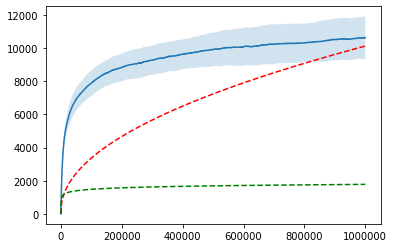

In [4]:
reg_np = np.array(regrets_list)
plt.plot(rounds_index,np.mean(reg_np,axis=0))
plt.fill_between(rounds_index, np.mean(reg_np,axis=0) - np.std(reg_np,axis=0),np.mean(reg_np,axis=0) + np.std(reg_np,axis=0), alpha=0.2)

gap_regret = 0.0
gap_best_alg = 0.0
for i in range(num_algs-1):
    gap_regret += 1.0/(rewards_params[3])
for i in range(num_arms[0]-1):
#     gap_best_alg += 1.0/(alg_rewards[algs[0]][0] - alg_rewards[algs[0]][i+1])
    gap_best_alg += 1.0/(rewards_params[1]+rewards_params[3] - rewards_params[2])
plt.plot(rounds_index, [4*np.sqrt(t*num_algs) + gap_best_alg*np.log(t+1) for t in rounds_index], 'r--')
plt.plot(rounds_index, [4*gap_regret*np.log(t+1) + gap_best_alg*np.log(t+1) for t in rounds_index], 'g--' )

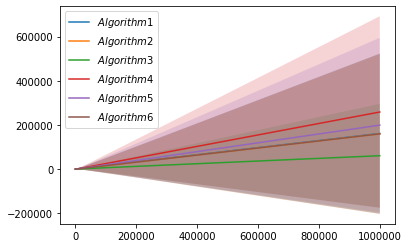

In [5]:
alg_pulls_np = np.array(alg_pulls_list)
alg_pulls_mean = np.mean(alg_pulls_np,axis=0)
alg_pulls_var = np.std(alg_pulls_np,axis=0)
labels = []
for i in range(alg_pulls_mean.shape[1]):
    plt.plot(rounds_index, alg_pulls_mean.T[i])
    plt.fill_between(rounds_index, alg_pulls_mean.T[i] - alg_pulls_var.T[i],\
                     alg_pulls_mean.T[i] + alg_pulls_var.T[i], alpha=0.2)
    labels.append(r'$Algorithm %i$' % (i+1))
plt.legend(labels)
plt.show()

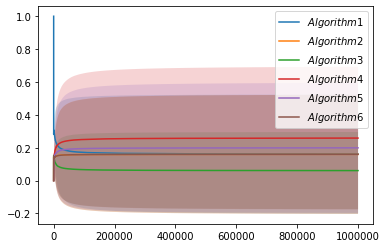

In [6]:
corral_distr_np = np.array(corral_distr_list)
corral_distr_mean = np.mean(corral_distr_np,axis=0)
corral_distr_var = np.std(corral_distr_np,axis=0)
labels = []
for i in range(corral_distr_mean.shape[1]):
    plt.plot(rounds_index, corral_distr_mean.T[i])
    plt.fill_between(rounds_index, corral_distr_mean.T[i] - corral_distr_var.T[i],\
                     corral_distr_mean.T[i] + corral_distr_var.T[i], alpha=0.2)
    labels.append(r'$Algorithm %i$' % (i+1))
plt.legend(labels)
plt.show()